#**6. Data Visualization - III**#

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import numpy as np

In [2]:
# Load the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df = pd.read_csv(url, names=columns)

###**Task-1: List down the features and their types**###

In [3]:
features_types = df.dtypes
print("Features and their Data Types:")
print(features_types)

Features and their Data Types:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object


###**Task-2: Histogram for each feature to illustrate the feature distribution**###

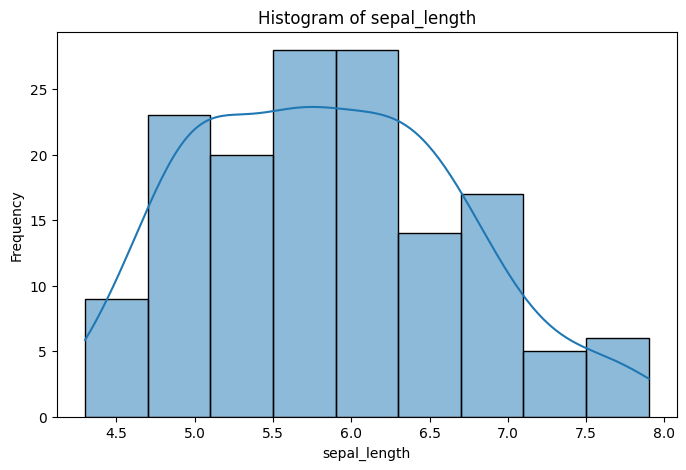

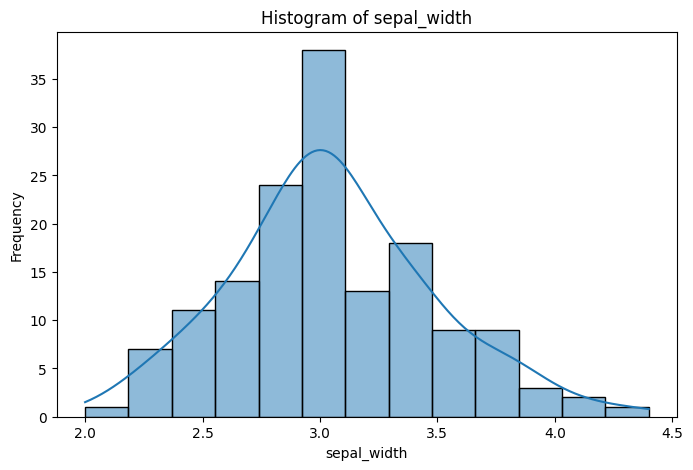

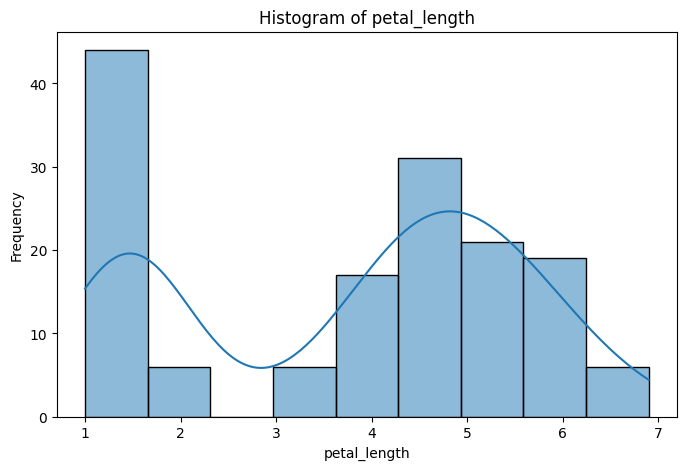

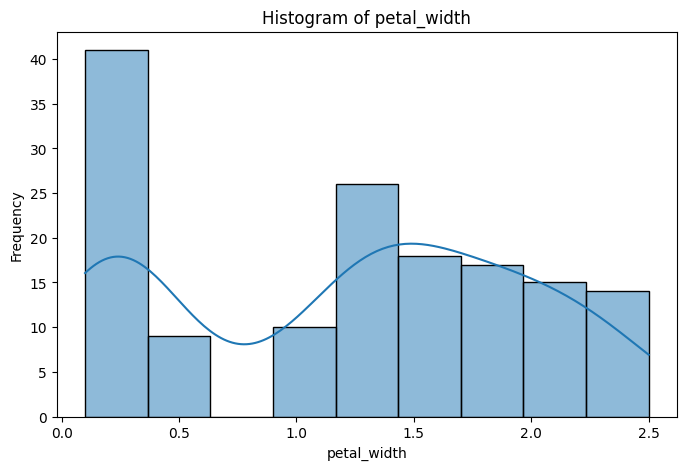

In [11]:
for column in df.columns[0: -1]:
  plt.figure(figsize=(8, 5))
  sns.histplot(df[column], kde=True)
  plt.title(f'Histogram of {column}')
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.show()

###**Task-3: Box Plot for each feature**###

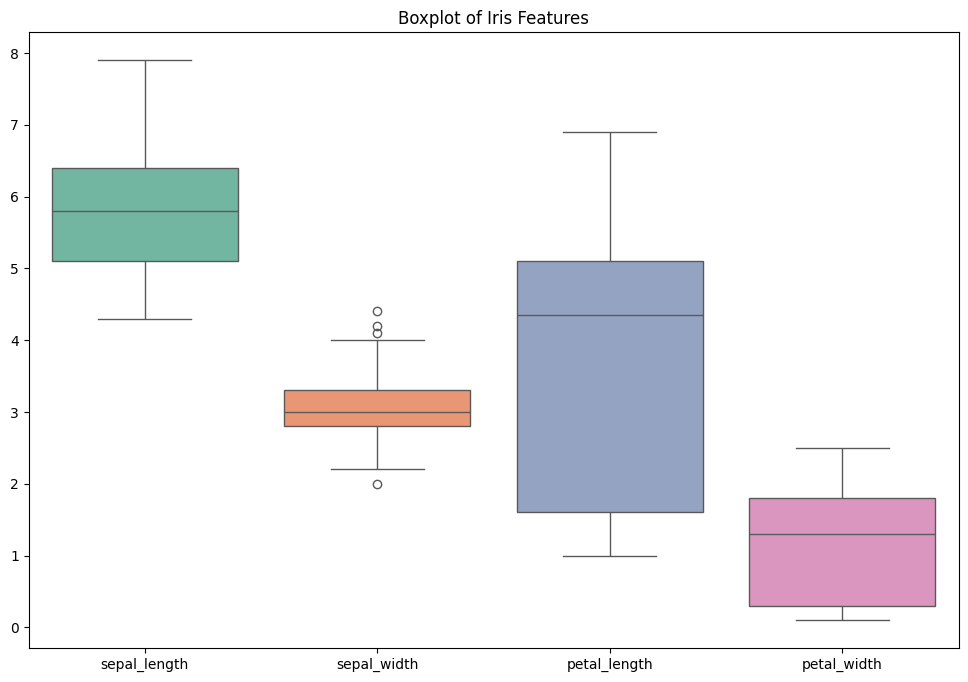

In [12]:
# Box plots to compare distributions
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.iloc[:, :-1], palette="Set2")
plt.title("Boxplot of Iris Features")
plt.show()

###**Task-4: Indentify the Outliers**###

####**1. Using Z-Score Method**####

In [8]:
# Identify outliers using z-scores
z_scores = zscore(df.iloc[:, :-1])
outliers = (z_scores > 3) | (z_scores < -3)

In [9]:
outlier_indices = np.column_stack(np.where(outliers))
outlier_rows = set(outlier_indices[:, 0])

print(f"Outlier rows: {outlier_rows}")
for row in outlier_rows:
    outlier_values = df.iloc[row, :-1]
    print(f"Row {row}: {outlier_values.to_dict()}")

Outlier rows: {15}
Row 15: {'sepal_length': 5.7, 'sepal_width': 4.4, 'petal_length': 1.5, 'petal_width': 0.4}


####**2. Using IQR Method**####

In [7]:
for column in df.columns[0: -1]:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
  print(f"Potential Outliers in {column}:")
  print(outliers, "\n")

Potential Outliers in sepal_length:
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, class]
Index: [] 

Potential Outliers in sepal_width:
    sepal_length  sepal_width  petal_length  petal_width            class
15           5.7          4.4           1.5          0.4      Iris-setosa
32           5.2          4.1           1.5          0.1      Iris-setosa
33           5.5          4.2           1.4          0.2      Iris-setosa
60           5.0          2.0           3.5          1.0  Iris-versicolor 

Potential Outliers in petal_length:
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, class]
Index: [] 

Potential Outliers in petal_width:
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, class]
Index: [] 





---

